# Deep Learning für Visual Computing: Übungsblatt 02


**Von: Maximilian Mundt, Radmehr Nouri Inanlou**

**Abgabe: 27.04.2022**

## Importe für diese Hausaufgabe

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size": 14})


## a) Uneingeschränkte Optimierung

Implementieren Sie eine Funktion `rosenbrock(x, y, a, b)`, die sowohl den Funktionswert $f(x, y)$ entsprechend Gleichung (1) für die Parameter $a, b$ zurückgibt, als auch
den Wert des Gradienten $\nabla f(x, y)$.

In [14]:
def rosenbrock(x, y, a, b):
    f = (a - x) ** 2 + b * (y - x**2) ** 2

    gradient = np.array([-2 * a + 4 * b * x**3 - 4 * b * x * y + 2 * x, 2 * b * (y - x**2)])

    return f, gradient


Implementieren Sie eine Funktion, die die Rosenbrock Funktion als logarithmisches
Konturdiagramm (logarithmisch entlang $z$-Achse) im Intervall $[−4, 4]^2$ mit Parametern
$a = 1$ und $b = 100$ visualisiert. Zusätzlich soll in dem selben Plot das globale Minimum
$(x, y) = (1, 1)$ der Funktion markiert sein.


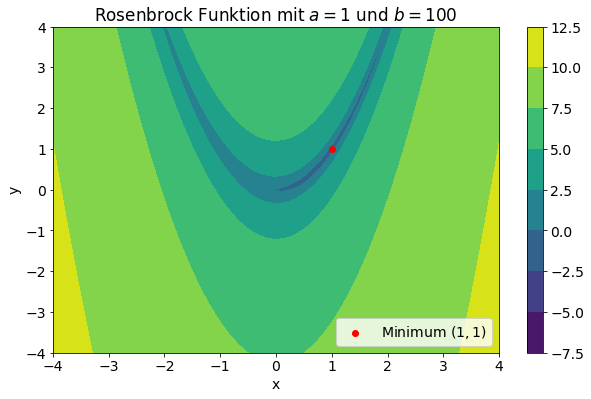

In [62]:
def rosenbrock_contour():
    a = 1
    b = 100

    x = y = np.linspace(-4, 4, 1000)
    X, Y = np.meshgrid(x, y)

    Z = np.log(rosenbrock(X, Y, a, b)[0])

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    cs = ax.contourf(X, Y, Z)
    fig.colorbar(cs)

    ax.scatter(1, 1, color="red", label="Minimum $(1,1)$")

    ax.legend(loc="lower right")
    ax.set_title("Rosenbrock Funktion mit $a=1$ und $b=100$")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    #plt.savefig("figure.png", dpi=300, facecolor="white")


rosenbrock_contour()


Implementieren Sie eine Klasse `GradientDescent`, die Gradientenabstieg ohne Momentum verwendet, um den Parameter optimieren.

In [76]:
class GradientDescent:
    def __init__(self, learning_rate, theta):
        self.learning_rate = learning_rate
        self.theta = theta

    def step(self, grad):
        self.theta = self.theta - self.learning_rate * grad


Implementieren Sie eine Klasse `MomentumGradientDescent`, die Gradientenabstieg mit
Momentum verwendet, um den Parameter optimieren.

In [9]:
class MomentumGradientDescent:
    def __init__(self, learning_rate, theta, momentum_parameter, initial_velocity):
        self.learning_rate = learning_rate
        self.theta = theta
        self.momentum_parameter = momentum_parameter
        self.velocity = initial_velocity

    def step(self, grad):
        self.velocity = self.momentum_parameter * self.velocity - self.learning_rate * grad
        self.theta = self.theta + self.velocity


Implementieren Sie eine Klasse `RMSPropGradientDescent`, die RMSProp ohne Momentum verwendet, um den Parameter optimieren.

In [10]:
# todo

Implementieren Sie eine Klasse `AdaMomentumGradientDescent`, die RMSProp mit Momentum kombiniert, um den Parameter optimieren

In [11]:
# todo

Verwenden Sie die Methoden um das globale
Minimum der Rosenbrock Funktion zu finden, angefangen von dem Punkt $(x, y) = (−2, −2)$.
Implementieren Sie dazu eine Funktion `optimize(optim, steps)`, die eine Instanz eines
Optimierungsverfahrens als Argument nimmt und den Algorithmus `steps`-mal anwendet
um das Minimum der Rosenbrock Funktion mit Parameter $a = 1, b = 100$ zu finden. 

final point: [-0.00230872 -0.02761976]


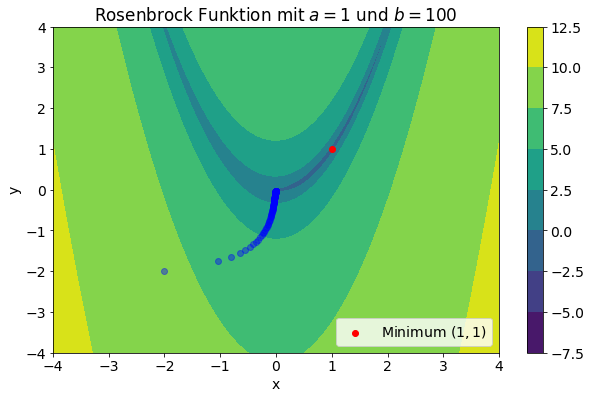

In [91]:
def optimize(optim, steps=10):
    rosenbrock_contour()

    for i in range(steps):
        x = optim.theta[0]
        y = optim.theta[1]
        plt.scatter(x, y, color="blue", alpha=0.4)

        gradient = rosenbrock(x, y, 1, 100)[1]

        optim.step(gradient)

    print("final point:", optim.theta)


optimize(GradientDescent(0.0002, np.array([-2, -2])), steps=100)


## b) Mini-Batch Optimierung in Pytorch

In [ ]:
# todo

## c) Optimierung mit Nebenbedingungen

In [ ]:
# todo